### MATH 157 FINAL: PROJECT MACHINE LEARNING AND ALGORITHMIC BIAS

### Introduction to Machine Learning

As a branch of Artificial Intelligence, Machine Learning is a data analysis method that automates analytical model building. The idea is that with minimal human involvement, systems learn from data, find patterns, and create decisions.

The significance of Machine Learning is its action of iteration. Meaning, as models created by Machine Learning are prone to new data, the systems involved with Machine Learing become independently adapt. The systems learn to produce decisions and results that are both reliable and repeatable.

Examples and uses of Machine Learning can be found in the most aspects we take for granted.

- Netflix recommendations based on shows you've watched.
- Twitter posts related to criticism or posts involving you.
- Used by health care industries to have real time patient data and analyze next steps for patient care.
- Used by the government to analyze dat related to saving and being effiecient with money spending, along with finding fraud and reducing identity theft.
- Used by Oil and Gas companies to find new energy sources and predict failure in refinery sensors. Also used to streamline oil distribution so that it is more efficient and cost-effective. 


###  scikit-learn

To understand how exactly the inner workings of Machine Learning works, our course introduced the scikit-learn module. This is a Python libray with Machine Learning tools and functions that is
- Simple and efficient for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source and commercially usable

The module includes six aspects Machine Learning is involved with:

- Classification
- Regression
- Clustering
- Dimensionality Reduction
- Model Selection
- Preprocessing

For this presentation we will focus on Classification.

### Classification with K-Nearest Neighbors (KNN)

In Machine Learning, Classification is   "the process of predicting class or category from observed values or given data points." In other words, it is the action of having different categorical output such as black or white or inside or outside.

In mathematical terms, "classification is the task of approximating a mapping function (f) from input variables (X) to output variables (Y)." In other words, you put an x in some sort of function and you get an output of y.

The K-Nearset Neighbor (KNN) part is a category under Supervised Learning, which is used to predict catogorical variables.

Let us look at an example of classification that involves the iris dataset of three types of irises we have seen in class and on past homework assignments.

In [87]:
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

Next, we build the KNN classifier where with our iris dataset the classifier determines what data of the iris dataset have close features and assigns the predominnt class.

In [88]:
iris = datasets.load_iris()
# firstly we build a kNN classifier among all the features
X, y = iris.data, iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Based on its sepal width and length, we use the next code below to predict the kind of iris we have.

In [71]:
# What kind of iris has 5cm x 5cm sepal and 4cm x 4cm petal?
print(iris.target_names[knn.predict([[5, 5, 4, 4]])])

['virginica']


Let's now build another KNN classifier and predict another iris, this time with only two features, specifcally sepal width and sepal length.

In [72]:
# Slicing by using a two-dim dataset
X, y = iris.data[:, :2], iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [73]:
# Return coordinate matrices from coordinate vectors
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
# kNN prediction
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

(4.2, 8.0, 1.9, 4.5)

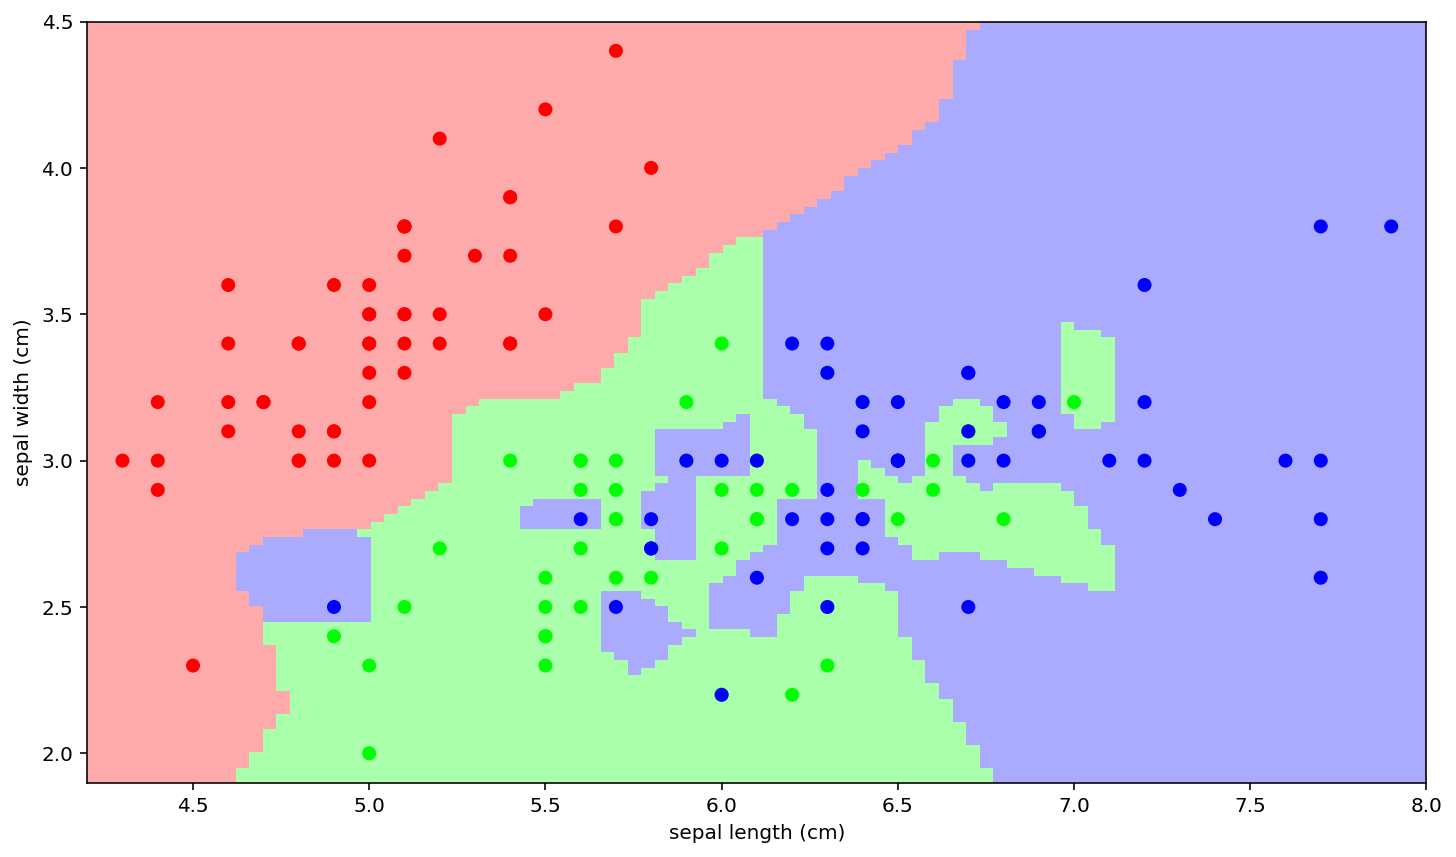

In [74]:
# Create color maps for 3-class classification problem
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Add the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

If we ran the actual we should be able to see two plots of the sepal space and the prediction, which involve with either with a single nearest neighbor or three nearest neighbours.

Thus, this iris example gives us a good understanding on classification problem: a task of determining whether an object is a Setosa, a Versicolor, or a Virginicas iris, where the label is from three distinct categories. After using KNN classifier, we are able to easily predict the type of a iris based on the reference database, and which should fall into one of the above neighbours.

### Algorithmic Bias

So what exactly is Algorithmic Bias?

In the context of Machine Learning, Algorithimc Bias, according to Jaspreet, is "the phenomena of observing results that are systematically prejudiced due to faulty assumptions." In other words, it is the idea that systems obtain data that is not repesentative of a certain entire population. The data is gathered from the population in a way that is in-favor of the one sampling, or better yet bias towards the one gathering the data, the human!

To be general, if data was gathered under a bias perspective of some sort, then once inputted into a system, the system itself will learn to be bias as well! And this is both dangeorus and unethical! A machine will only learn what we input in it and if we are bias, the machine itself will follow the bias we taught it to follow! 

Let's take a look at how Bias is involved with the Classification with KNN.

### Classification with KNN and Algorithmic Bias


1. Calulate the distance

Before the algorithm performs any step to build KNN, it firstly measure the distance (Euclidian, Manhattan, Minkowski or Weighted) from the new data to all others data that is already classified. So one of the cons of kNN is you must know a meaningful distance function.

KNN uses distance metrics in order to find similarities or dissimilarities, so that's why it requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors<sup>5<sup>.

Its formula is the below:

    $$d(p,q) = d(q,p) = \sqrt{(q1-p1)^{2} + (q2-p2)^{2} +...+ (qn-pn)^{2}} = \sqrt{ \sum_{i=1}^n (q_{i}- p_{i})^{2}}$$

In [75]:
from math import sqrt

In [76]:
# function to calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [77]:
# Let's create a dataset to see what the distance function outputs
dataset = [[2.7810836,2.550537003,0],
           [1.465489372,2.362125076,0],
           [3.396561688,4.400293529,0],
           [1.38807019,1.850220317,0],
           [3.06407232,3.005305973,0],
           [7.627531214,2.759262235,1]]
row0 = dataset[0]
for row in dataset:
    dist = euclidean_distance(row0, row)
    print(dist)

0.0
1.3290173915275787
1.9494646655653247
1.5591439385540549
0.5356280721938492
4.850940186986411


The distances between the first row and every row in the dataset, including itself are outputted by the code above. Basically, this code calculates the distance between each train and test data point.

2. Find k nearest neighbors

After calculating the distance between each train and test data point, we will select the top nearest according to the value of k by the scikit KNN classifier. There is no structured method to find the best value for “K”. We needto find out with various values by trial and error and assuming that training data is unknown.

In [78]:
# Function just to see how does the kNN locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    # attention here... we need to recursively compute the distance between each query to training data
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

From here, we see that the computation cost is quite high because we need to compute the distance of each query instance to all training samples.

It prints 3 most similar records in this dataset. As expected, the first record is the most similar to itself and is at the top of the list.

In [79]:
# Print out the 3 most similar neighbors
neighbors = get_neighbors(dataset, dataset[0], 3)
for neighbor in neighbors:
    print(neighbor)

[2.7810836, 2.550537003, 0]
[3.06407232, 3.005305973, 0]
[1.465489372, 2.362125076, 0]


How about 4?

In [80]:
# Print out the 4 most similar neighbors
neighbors = get_neighbors(dataset, dataset[0], 4)
for neighbor in neighbors:
    print(neighbor)

[2.7810836, 2.550537003, 0]
[3.06407232, 3.005305973, 0]
[1.465489372, 2.362125076, 0]
[1.38807019, 1.850220317, 0]



So the first 3 most similar neighbors are the same, only adds the 4th most.

Therefore, another challenged step in kNN is we need to determine the value of parameter K (number of nearest neighbors). A good value for K is determined experimentally, and if the k value we piack is not the good one, it may cause some bias towards the prediction later.

We will use the iris dataset again here...

In [89]:
iris = datasets.load_iris()
X, y = iris.data[:,:2], iris.target
#Prepare data for classification proces
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#Create a model
iris_knn = neighbors.KNeighborsClassifier()
#Train the model
iris_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


You can see in the above code we are using Minkowski distance metric with value of p as 2 i.e. KNN classifier is going to use Euclidean Distance Metric formula.

In [90]:
#Let's predict the classes for test data
predict_train = iris_knn.predict(x_train)
pred_test = iris_knn.predict(x_test)

In [0]:
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)
accuracy_test = accuracy_score(y_test,pred_test)
print('accuracy_score on test dataset : ', accuracy_test)

Let's create another kNN model with 3 neighbors...

In [91]:
iris_knn2 = neighbors.KNeighborsClassifier(n_neighbors=3)
iris_knn2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [92]:
predict_train2 = iris_knn2.predict(x_train)
pred_test2 = iris_knn2.predict(x_test)

In [93]:
accuracy_train = accuracy_score(y_train,predict_train2)
print('accuracy_score on train dataset : ', accuracy_train)
accuracy_test = accuracy_score(y_test,pred_test2)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.8666666666666667
accuracy_score on test dataset :  0.7333333333333333


From the observations between 2 models, we can see by choosing different values of k will definitely impact the prediction on train data and test data, so that the accuracy between them will also be different. Based on the iris dataset, it looks like a smaller k values of nearest neighbor we choose, a higher accuracy score on train data we end up with.

In [94]:
Normalizing it...

### Algorithmic Bias in Real Life

So how specifically can we see bias in our system?

A perfect example of how Machine Learning and Algorithmic Bias go hand-in-hand is gathering data that involved discrimination in order to find out the possible average housing income in a certain area, which may reflect racial bias in housing (Kiran 2/28 Lecture). You should take a look here.

There may be another interesting one:

> According to the “No Free Lunch theorem” (Macready, 1997), all classifiers have the same error rate when averaged over all possible data generating distributions. Therefore, a certain classifier must have a certain bias towards certain distributions and functions to be better at modelling those distributions.

In this article, the author uses an example to illustrate a race bias--a controversial recidivism prediction tool called COMPAS to predict the criminals' risk of committing crimes in the future. A study done by ProPublica showed that the algorithm was twice as likely to label black defenders as high risk who eventually did not reoffend as compared to white defenders.

However, later according to the measures COMPAS used, black and white defenders had the same misclassification rate.


It turns out that both of the results may be correct since they use different measures for fairness. And there is no algorithm that can perform equally well on both the fairness measures if the base recidivism rates differ for blacks and whites. Both these fairness measures represent inherent tradeoffs3.


So how exactly do we deal with the bias in our data and in Machine Learning?

We cannot eliminate bias in the data we receive. Even the most randomly selected sample of a certain population may have some bias involved. What we can do is minimize the bias as much as we could.

### Furthermore...
Here are few tips we might be found helpful to manage/combat for bias in Machine Learning, assuming the data inputted into the system is already bias itself:

- Choose the right learning model for the problem
   - There’s no single model to follow that will avoid bias, but there are parameters that can inform your team as it’s building.
- Choose a representative training data set
   - Making sure the training data is diverse and includes different groups is essential, but segmentation in the model can be problematic unless the real data is similarly segmented.
- Monitor performance using real data
   - simulating real-world applications as much as possible when building algorithms since the public might not take best intentions for ethical violations.



###  Problems to Try:

### Problem 1: Simple model of kNN

1. Load csv files "test-data.csv" and "train-data.csv" into separate dataframes.

In [83]:
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

2. Now, we need to predict the missing target variable in the test data with target variable - Survived. Starting with creating the object of the K-Nearest Neighbor model and fit the model with data we have. Then print out your number of neighbors and predict the target on the train dataset and test dataset.

In [95]:
# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

model = neighbors.KNeighborsClassifier()
# fit the model with the training data
model.fit(train_x,train_y)

print('\nThe number of neighbors used to predict the target : ',model.n_neighbors)

predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train)

predict_test = model.predict(test_x)
print('\nTarget on test data',predict_test)


The number of neighbors used to predict the target :  5

Target on train data [0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 

3. Run below code to check you accuracy on train dataset and test dataset.

In [96]:
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.8047752808988764


In [97]:
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7150837988826816


### SOURCES AND COLLABORATORS

Collaborated with Shannon He A LOT! We both worked on collaborated on this project a lot

Machine Learning Intro: https://www.sas.com/en_us/insights/analytics/machine-learning.html

scikit-learn: https://scipy-lectures.org/packages/scikit-learn/index.html

Understanding of bias: https://towardsdatascience.com/understanding-and-reducing-bias-in-machine-learning-6565e23900ac

KNN: https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/?#

KNN cons: https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

Euclidean: https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

KNN analysis: https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e

Manage bias: https://techcrunch.com/2018/11/06/3-ways-to-avoid-bias-in-machine-learning/
